In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


c:\Users\Nacho\OneDrive - UPV\UPV\MIARFID\PID\.venv\lib\site-packages\geopandas\plotting.py:955: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.draw()


<Axes: >

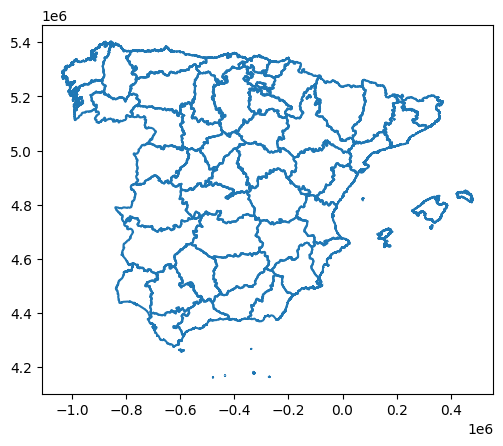

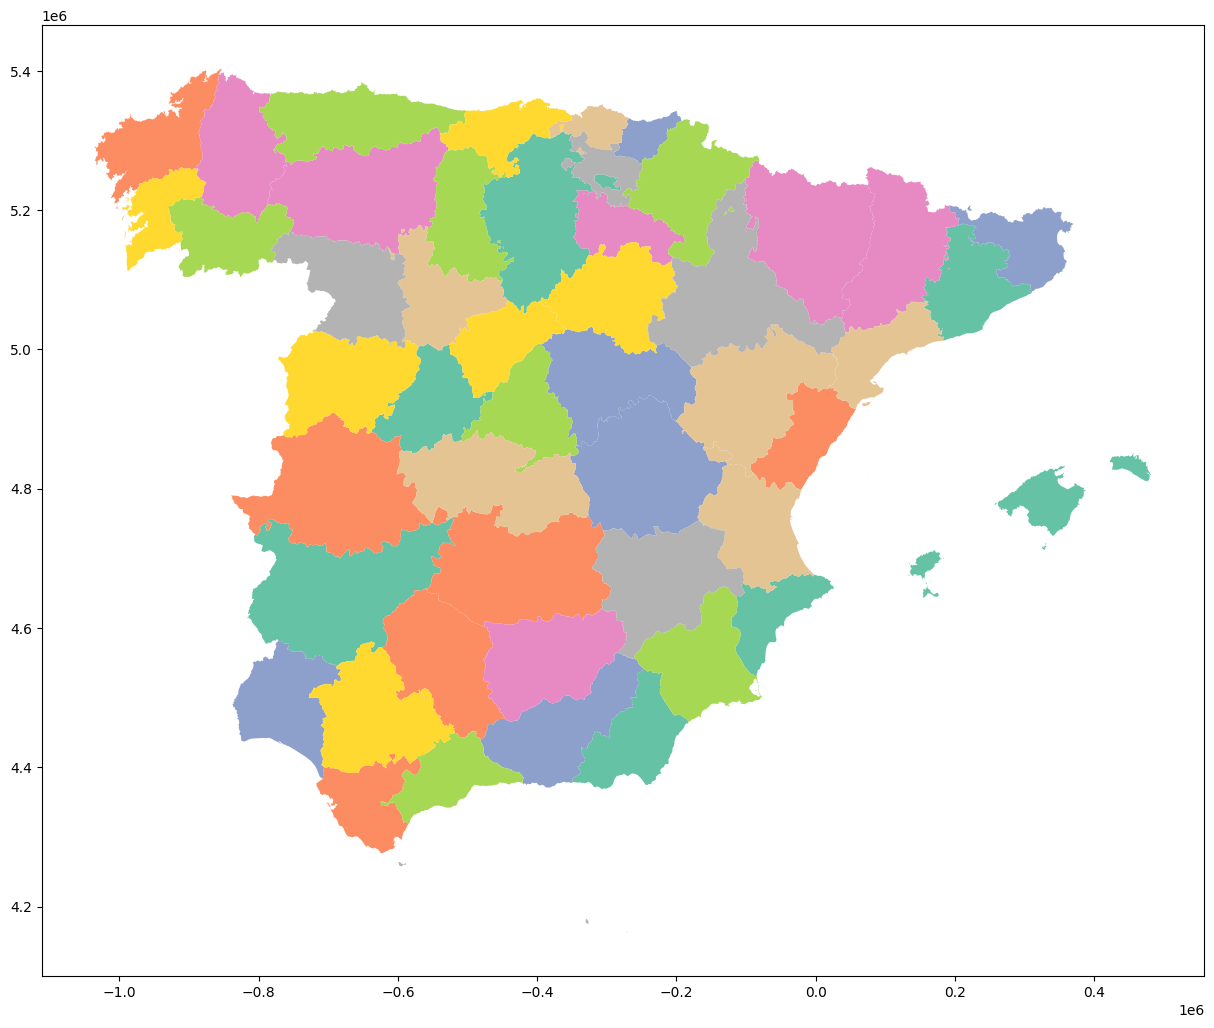

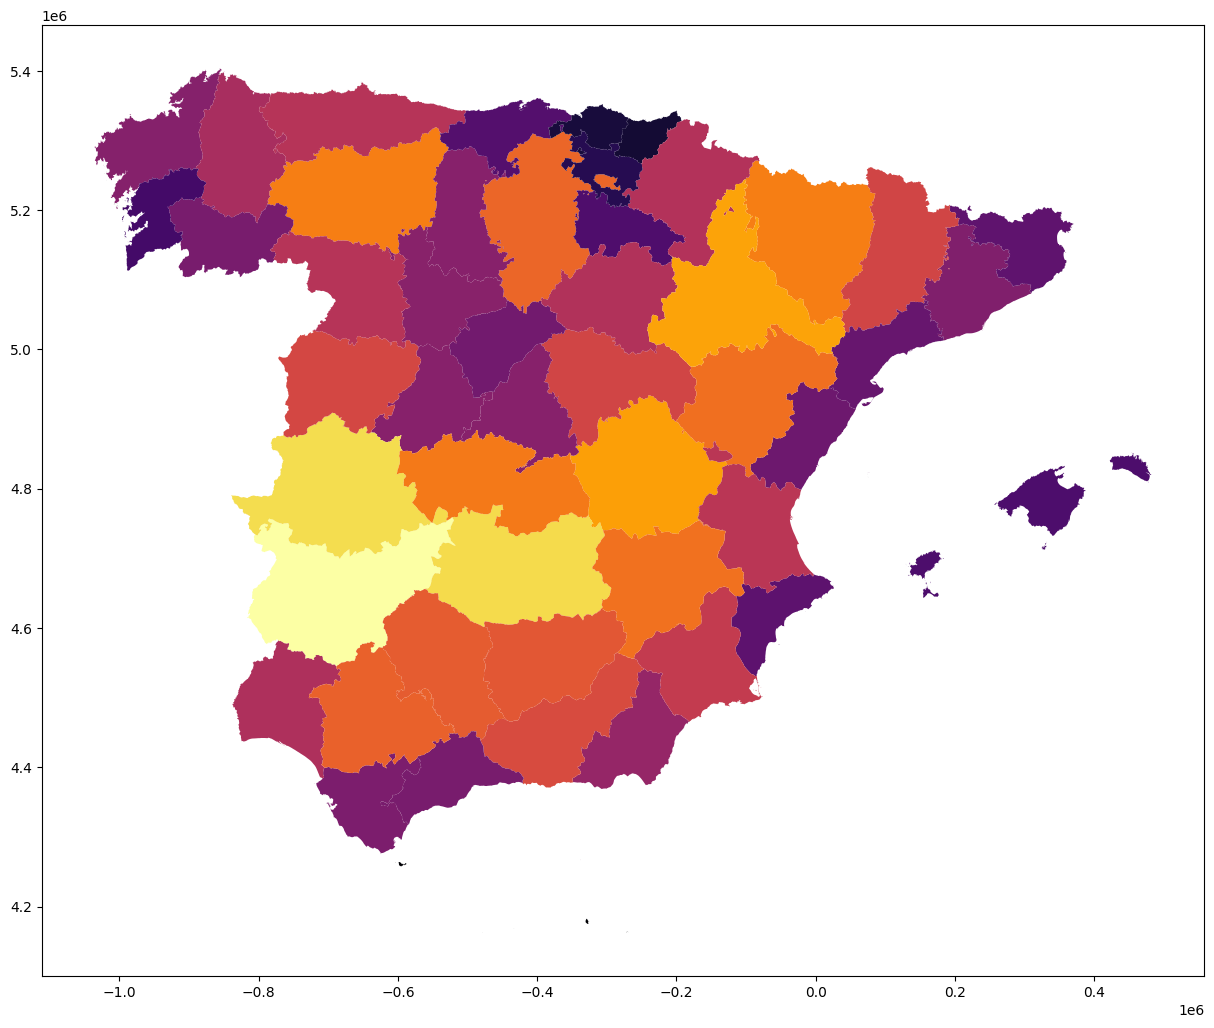

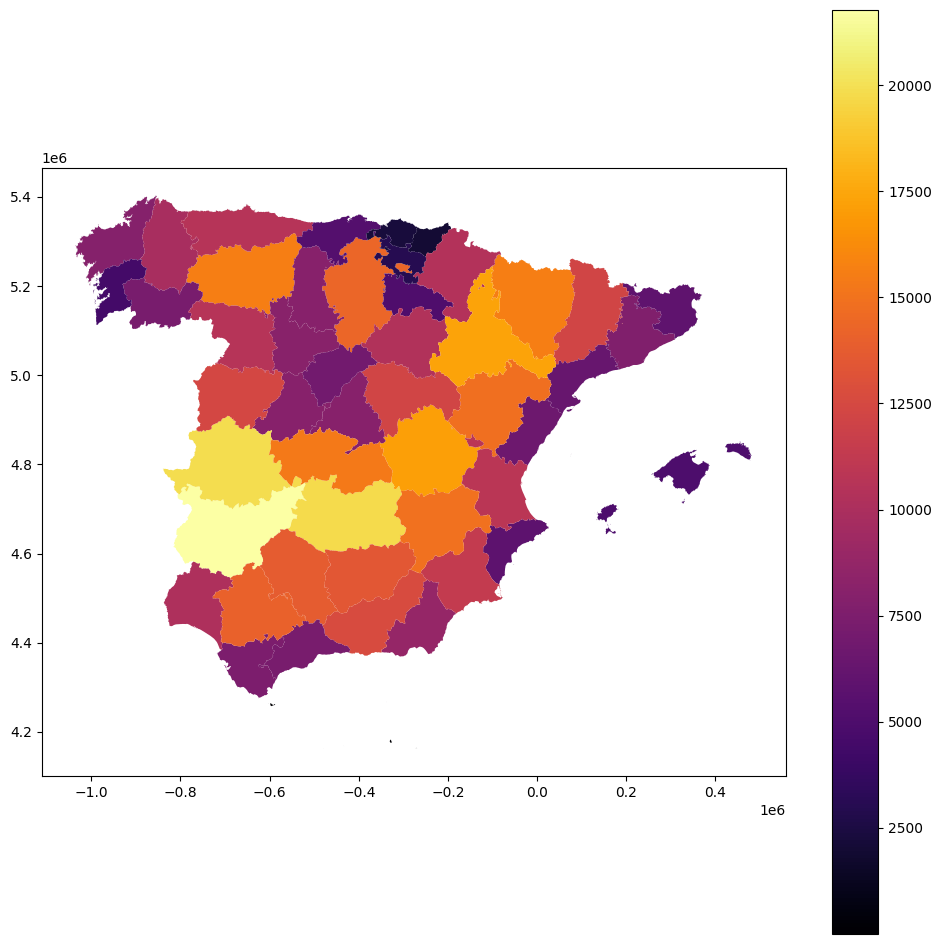

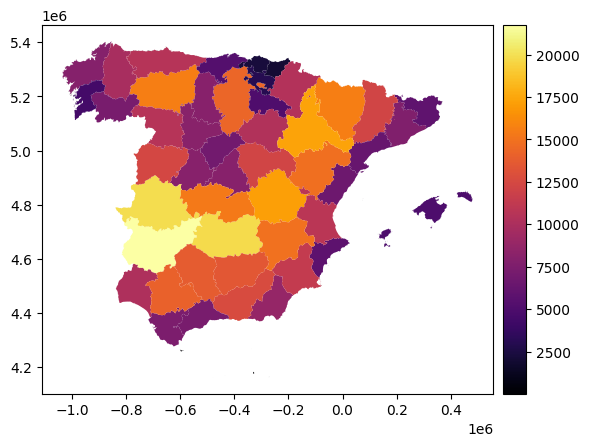

c:\Users\Nacho\OneDrive - UPV\UPV\MIARFID\PID\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


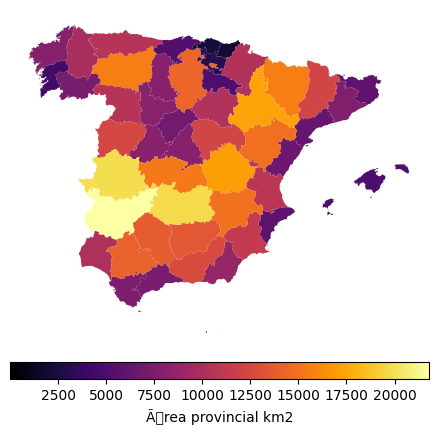

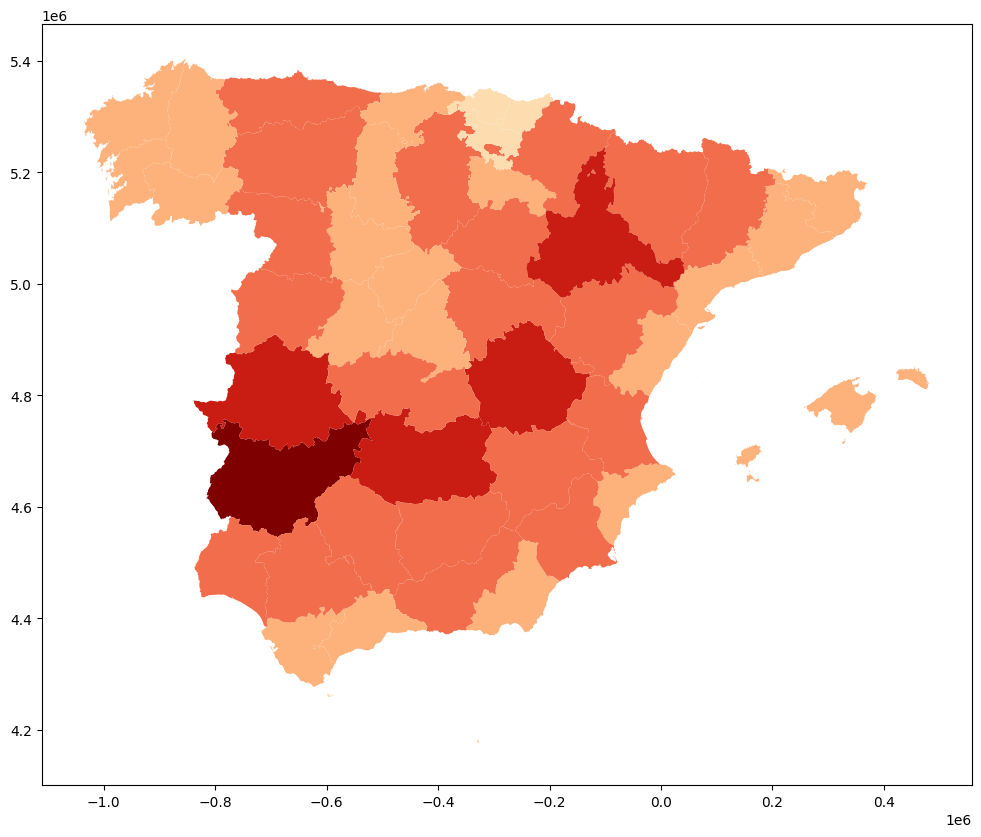

In [3]:
pd.options.display.max_columns = 25

#Calcular el Ã¡rea de las provincias, primero hay que proyectar
provincias = gpd.read_file('lineas_limite.zip!SHP_ETRS89/recintos_provinciales_inspire_peninbal_etrs89')
#INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT', 'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'
provincias = provincias.to_crs("+proj=cea EPSG:2062")
provincias['area'] = round(provincias.area/1000000,0)

#Mapa de coropletas: mapa temÃ¡tico con las Ã¡reas sombreadas de diferentes colores en funciÃ³n del valor de una columna
provincias = provincias.to_crs(crs=3395)
#LÃ­mites de las provincias
provincias.boundary.plot()
#Diferentes ColorMaps
provincias.plot(cmap='Set2', figsize=(15, 15))
provincias.plot(cmap='inferno', figsize=(15, 15), column='area')
#Con leyenda
provincias.plot(cmap='inferno', figsize=(12, 12), column='area', legend=True)
#Con leyenda ajustada al mapa
fig, axis = plt.subplots(1, 1)
divider = make_axes_locatable(axis)
cax = divider.append_axes("right", size="5%", pad=0.1)
provincias.plot(ax = axis, cmap='inferno', column='area', legend=True, cax=cax)
#Leyenda en la parte inferior y eliminar ejes
fig, axis = plt.subplots(1, 1)
axis.set_axis_off()
divider = make_axes_locatable(axis)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
provincias.plot(ax = axis, cmap='inferno', column='area', legend=True, cax=cax, legend_kwds={'label': "Ãrea provincial km2",'orientation': "horizontal"})
#Esquemas percentiles
provincias.plot(cmap='OrRd', figsize=(12, 12), column='area', scheme='percentiles')



         pop_est      continent                      name iso_a3  gdp_md_est   
0       889953.0        Oceania                      Fiji    FJI        5496  \
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

<Axes: >

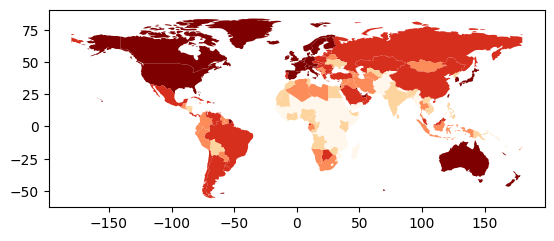

In [4]:

#Esquemas cuantiles
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world)
world = world[(world.pop_est>0) & (world.name!="Antarctica")].copy()
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')


<Axes: >

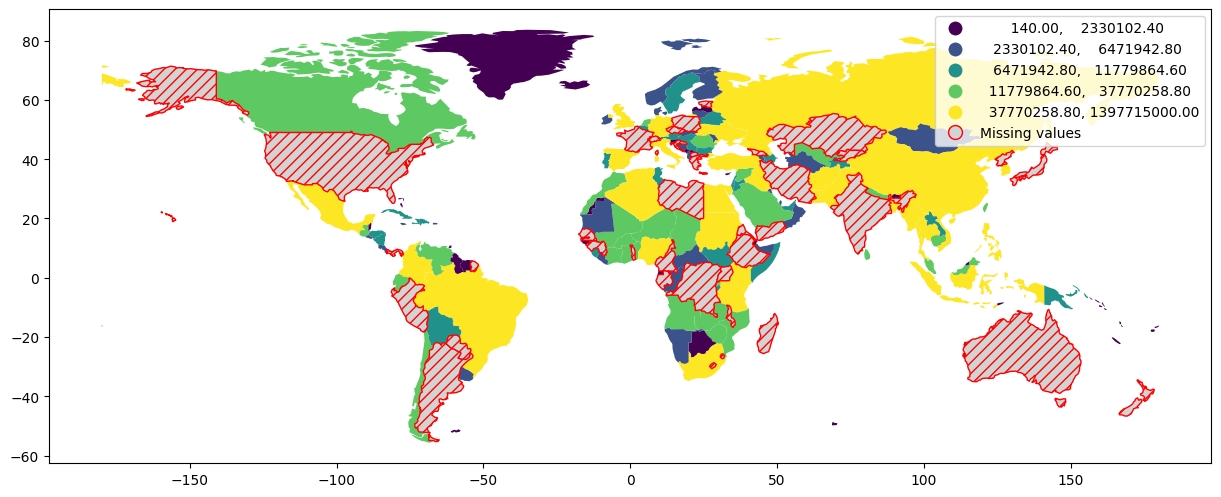

In [5]:

#Rellenar datos que faltan
world.loc[np.random.choice(world.index, 40), 'pop_est'] = np.nan
world.plot(column="pop_est",legend=True,scheme="quantiles",figsize=(15, 10),
           missing_kwds={"color": "lightgrey","edgecolor": "red","hatch": "///","label": "Missing values"})